# Rating Prediction Project

In [1]:
# import basic libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data

pd.set_option('display.max_colwidth',None)
df=pd.read_csv('all_tech_data.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Review,ShortReview,Rating
0,0,0,Very slow and not good 8gb ram according speed very slow and hang bad laptop plz don't money west,Very solow speed and hang laptop bad,4.0 out of 5 stars
1,1,1,Really hate the product. Its wastage of money. Its taking too long to start and its making a wierd noice in the background its too heavy and large and is not handy at ol.worst part is that they are not even ready to refund nor replace. Really pissed off,Its a regret!!,1.0 out of 5 stars
2,2,2,The Product Worth it,Good Product,5.0 out of 5 stars
3,3,3,Your browser does not support HTML5 video.\n Please don't buy this laptop. The screen keeps freezing. I bought this laptop for my daughters online classes but every 15-20mins whether using zoom or Microsoft teams it keeps freezing. Processor is too slow. Was coming back to HP brand after a gap of 10 years but this has reminded me that why I stayed away all these years. Please do not waste your hard earned money on this.,Please don't buy,1.0 out of 5 stars
4,4,4,This is a review after more than 6 months of usage.I had an azuz laptop. But since I had many problems while operating it I ordered this one. At first it was good But now it keeps switching off at times. At first had 9 hR battery now only 3-4 hrs. Not happy with the purchase.,Not good,2.0 out of 5 stars


In [3]:
# checking shape

df.shape

(23638, 5)

In [4]:
# checking data types

df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Review          object
ShortReview     object
Rating          object
dtype: object

## Data Cleaning and Preparation

In [5]:
# checking null value

df.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
Review          15
ShortReview     39
Rating           0
dtype: int64

In [6]:
# droping columns which has no use

df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [7]:
# droping null values

df.dropna(axis=0,inplace=True)
df.isnull().sum()

Review         0
ShortReview    0
Rating         0
dtype: int64

In [8]:
# convert all review text into lowercase

df['Review']=df['Review'].apply(lambda x: x.lower())
df['Review'].head()

0                                                                                                                                                                                                                                                                                                                                          very slow and not good 8gb ram according speed very slow and hang bad laptop plz don't money west
1                                                                                                                                                                              really hate the product. its wastage of money. its taking too long to start and its making a wierd noice in the background its too heavy and large and is not handy at ol.worst part is that they are not even ready to refund nor replace. really pissed off
2                                                                                                                                             

In [9]:
# Remove all punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['Review'] = df['Review'].apply(punctuation_removal)
df['Review'].head()

0                                                                                                                                                                                                                                                                                                                                  very slow and not good 8gb ram according speed very slow and hang bad laptop plz dont money west
1                                                                                                                                                                         really hate the product its wastage of money its taking too long to start and its making a wierd noice in the background its too heavy and large and is not handy at olworst part is that they are not even ready to refund nor replace really pissed off
2                                                                                                                                                               

In [10]:
# Removing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() 
                                                  if word not in (stop)]))
df['Review'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                                                                                                                                                                                     slow good 8gb ram according speed slow hang bad laptop plz dont money west
1                                                                                                                                       really hate product wastage money taking long start making wierd noice background heavy large handy olworst part even ready refund replace really pissed
2                                                                                                                                                                                                                                                                                  product worth
3    browser support html5 video please dont buy laptop screen keeps freezing bought laptop daughters online classes every 1520mins w

In [11]:
# checking common words

freq = pd.Series(' '.join(df['Review']).split()).value_counts()[:10]
print(freq)

# common word removing

freq = list(freq.index)
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() 
                                               if x not in freq))


good       14981
product    12236
quality     9573
one         6380
use         5134
also        5080
price       4723
like        4557
sound       4281
2           4248
dtype: int64


In [12]:
# cleaning Rating data value

df1=df['Rating'].str.split(".",n=1,expand=True)
df["Rating"]=df1[0]
df['Rating'].head()  # check

0    4
1    1
2    5
3    1
4    2
Name: Rating, dtype: object

In [13]:
# checking problems

df["Rating"].value_counts()

5                     10556
1                      5916
4                      3835
3                      1970
2                      1306
Playseat Challenge        1
Name: Rating, dtype: int64

In [14]:
# replace with 4

df["Rating"]=df['Rating'].replace("Playseat Challenge","4")
df["Rating"].value_counts()

5    10556
1     5916
4     3836
3     1970
2     1306
Name: Rating, dtype: int64

In [15]:
# changing object type into intiger value

df["Rating"]=df["Rating"].astype(int)
df["Rating"].dtype  #check()

dtype('int32')

# Data Exploration

5    10556
1     5916
4     3836
3     1970
2     1306
Name: Rating, dtype: int64


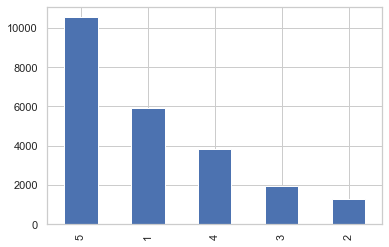

In [16]:
# How many fake and real articles?

sns.set(style=('whitegrid'))
print(df['Rating'].value_counts())
df['Rating'].value_counts().plot(kind="bar")
plt.show()

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


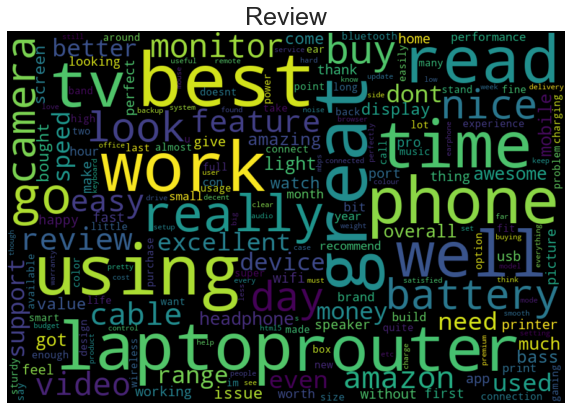

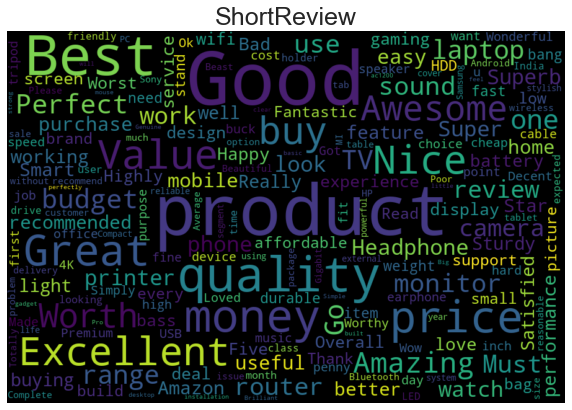

In [18]:
# Word cloud for 5 rating Review

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 5]
all_words = ' '.join([Review for Review in rating_5.Review])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Review",fontsize=25)
plt.show()

# Word cloud for 5 rating short review

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 5]
all_words = ' '.join([ShortReview for ShortReview in rating_5.ShortReview])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("ShortReview",fontsize=25)
plt.show()


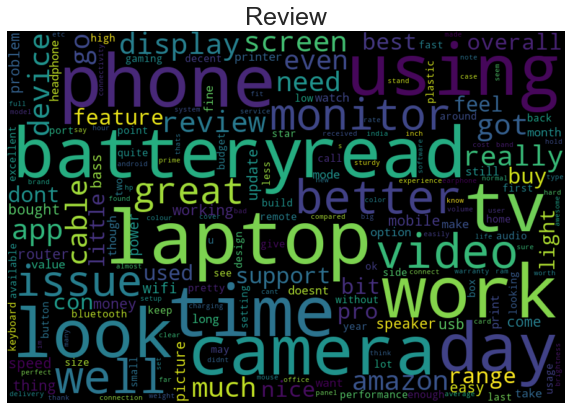

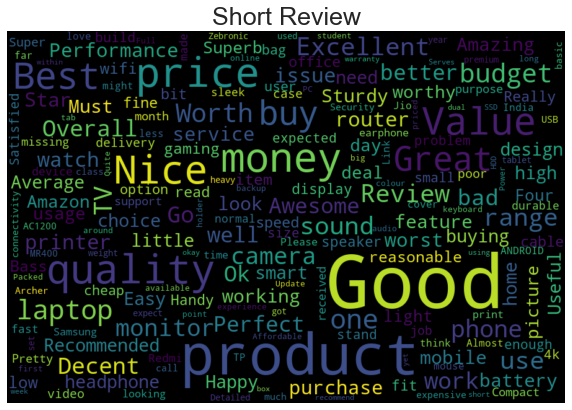

In [19]:
# Word cloud for 4 rating 

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 4]
all_words = ' '.join([Review for Review in rating_5.Review])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Review",fontsize=25)
plt.axis("off")
plt.show()

# Word cloud for 4 rating short review

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 4]
all_words = ' '.join([ShortReview for ShortReview in rating_5.ShortReview])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Short Review",fontsize=25)
plt.show()

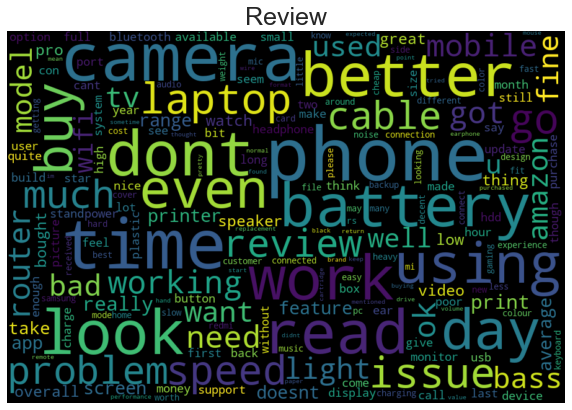

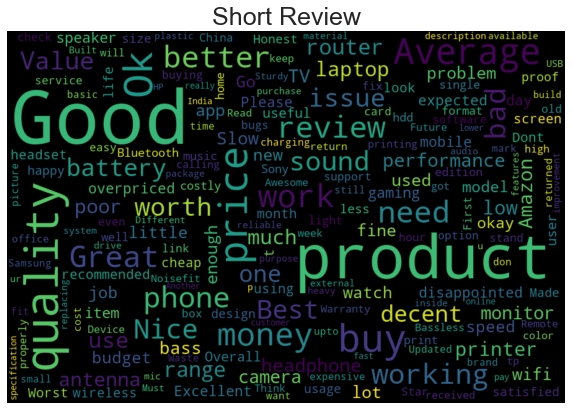

In [20]:
# Word cloud for 3 rating

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 3]
all_words = ' '.join([Review for Review in rating_5.Review])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Review",fontsize=25)
plt.axis("off")
plt.show()

#========================================= Word cloud for 3 rating short review

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 3]
all_words = ' '.join([ShortReview for ShortReview in rating_5.ShortReview])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Short Review",fontsize=25)
plt.show()

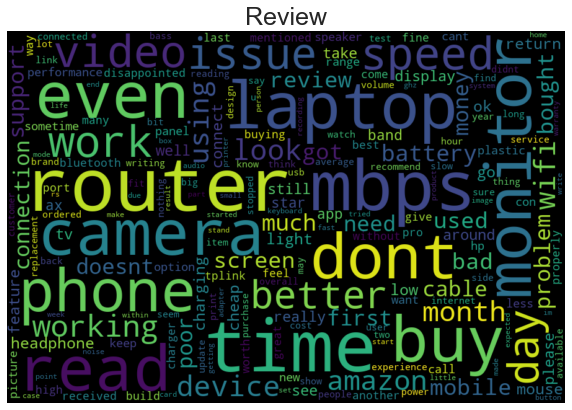

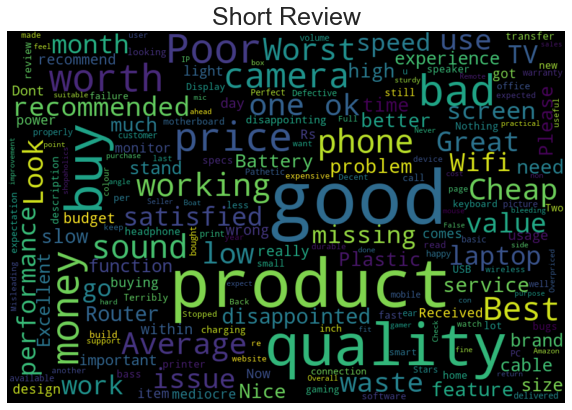

In [21]:
#========================================== Word cloud for 2 rating ======================================================

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 2]
all_words = ' '.join([Review for Review in rating_5.Review])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Review",fontsize=25)
plt.axis("off")
plt.show()

#========================================= Word cloud for 2 rating short review=============================================

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 2]
all_words = ' '.join([ShortReview for ShortReview in rating_5.ShortReview])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Short Review",fontsize=25)
plt.show()

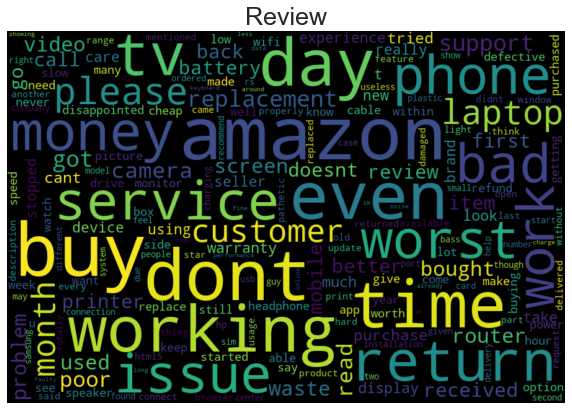

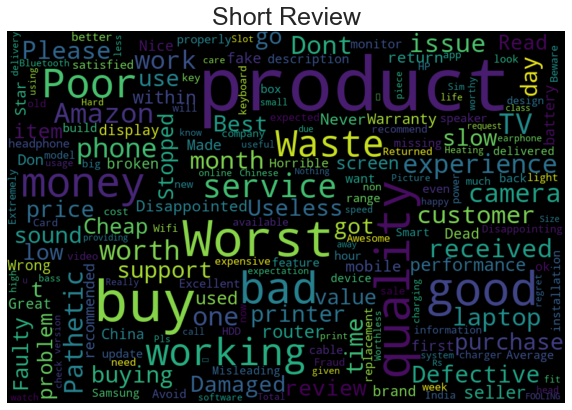

In [22]:
# Word cloud for 1 rating

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 1]
all_words = ' '.join([Review for Review in rating_5.Review])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Review",fontsize=25)
plt.axis("off")
plt.show()

#========================================= Word cloud for 1 rating short review

from wordcloud import WordCloud

rating_5 = df[df["Rating"] == 1]
all_words = ' '.join([ShortReview for ShortReview in rating_5.ShortReview])

wordcloud = WordCloud(width= 900, height= 600,
                          max_font_size = 120,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Short Review",fontsize=25)
plt.show()

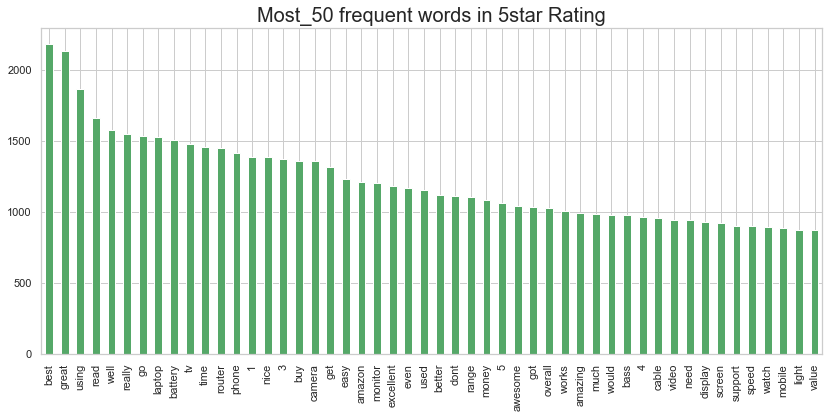

In [23]:
# Most frequent words in 5star rating

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 5]
plt.figure(figsize=(14,6))
pd.Series(' '.join(ratings['Review']).split()).value_counts()[:50].plot(kind='bar',color='g')
plt.xticks(rotation=90)
plt.title("Most_50 frequent words in 5star Rating",fontsize=20)
plt.show()

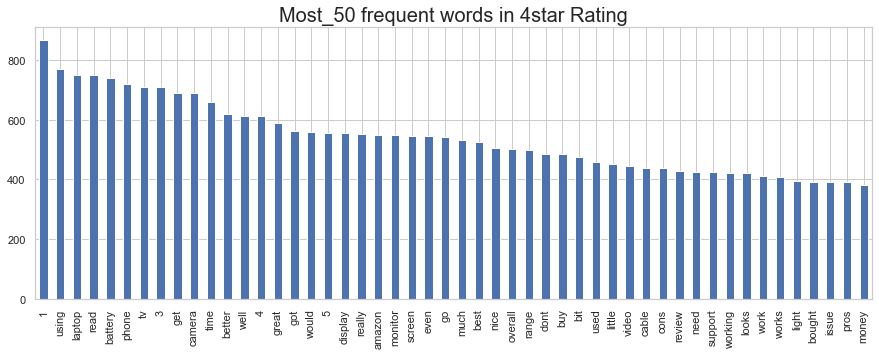

In [24]:
# Most frequent words in 4star rating

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 4]
plt.figure(figsize=(15,5))
pd.Series(' '.join(ratings['Review']).split()).value_counts()[:50].plot(kind='bar',color='b')
plt.xticks(rotation=90)
plt.title("Most_50 frequent words in 4star Rating",fontsize=20)
plt.show()

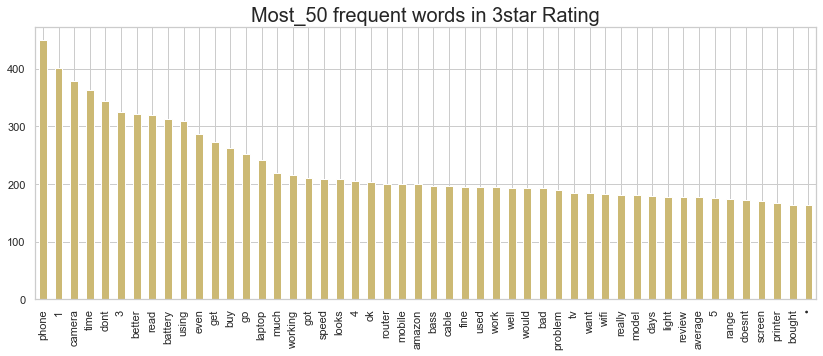

In [25]:
# Most frequent words in 3star rating

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 3]
plt.figure(figsize=(14,5))
pd.Series(' '.join(ratings['Review']).split()).value_counts()[:50].plot(kind='bar',color='y')
plt.xticks(rotation=90)
plt.title("Most_50 frequent words in 3star Rating",fontsize=20)
plt.show()

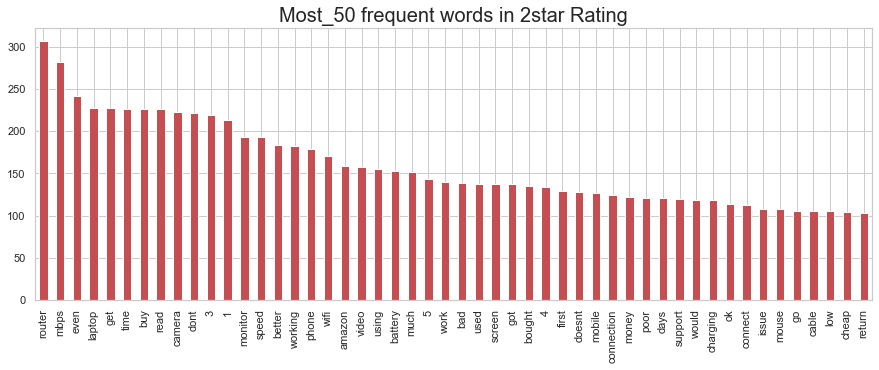

In [26]:
# Most frequent words in 2star rating

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 2]
plt.figure(figsize=(15,5))
pd.Series(' '.join(ratings['Review']).split()).value_counts()[:50].plot(kind='bar',color='r')
plt.xticks(rotation=90)
plt.title("Most_50 frequent words in 2star Rating",fontsize=20)
plt.show()

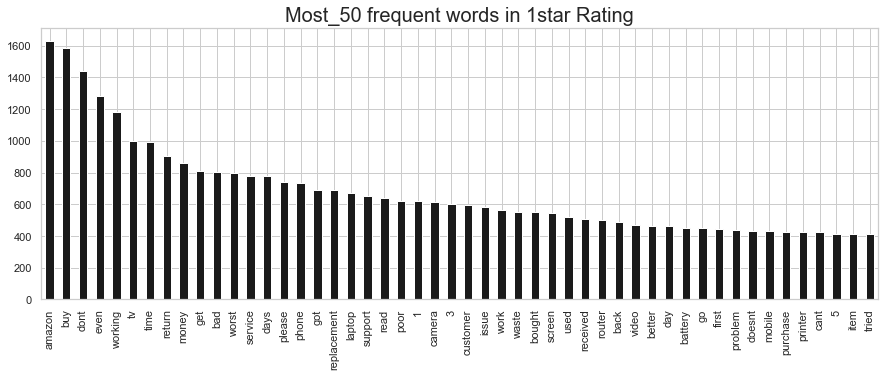

In [27]:
# Most frequent words in 1star rating

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 1]
plt.figure(figsize=(15,5))
pd.Series(' '.join(ratings['Review']).split()).value_counts()[:50].plot(kind='bar',color='k')
plt.xticks(rotation=90)
plt.title("Most_50 frequent words in 1star Rating",fontsize=20)
plt.show()

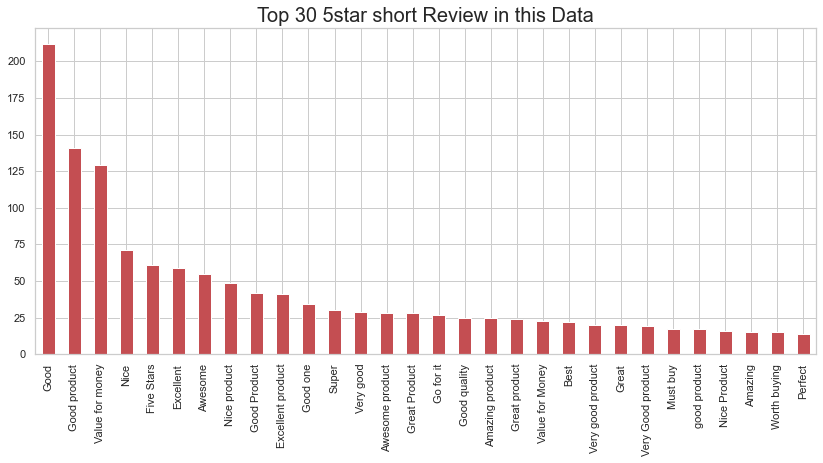

In [28]:
# top 30 5star short review in this data

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 5]
plt.figure(figsize=(14,6))
ratings['ShortReview'].value_counts()[:30].plot(kind='bar',color='r')
plt.xticks(rotation=90)
plt.title("Top 30 5star short Review in this Data",fontsize=20)
plt.show()

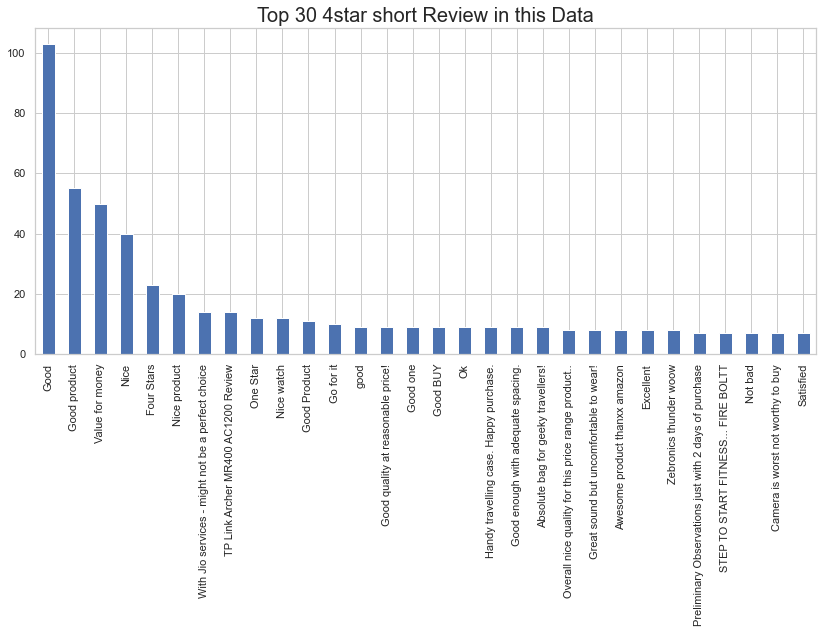

In [29]:
# top 30 4star short review in this data

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 4]
plt.figure(figsize=(14,6))
ratings['ShortReview'].value_counts()[:30].plot(kind='bar',color='b')
plt.xticks(rotation=90)
plt.title("Top 30 4star short Review in this Data",fontsize=20)
plt.show()

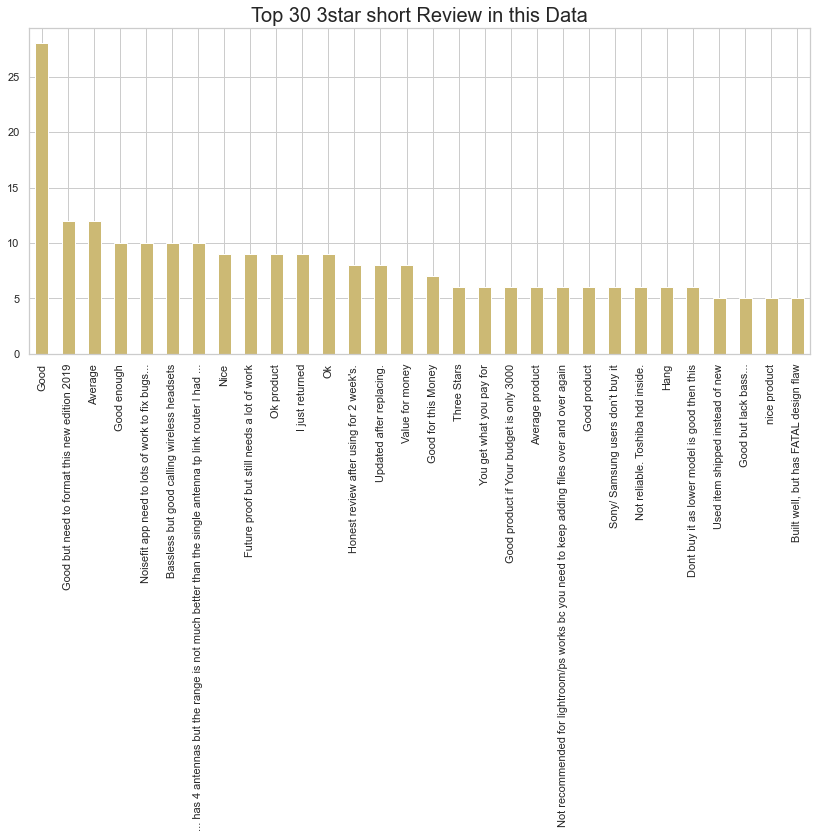

In [30]:
# top 30 3star short review in this data

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 3]
plt.figure(figsize=(14,6))
ratings['ShortReview'].value_counts()[:30].plot(kind='bar',color='y')
plt.xticks(rotation=90)
plt.title("Top 30 3star short Review in this Data",fontsize=20)
plt.show()

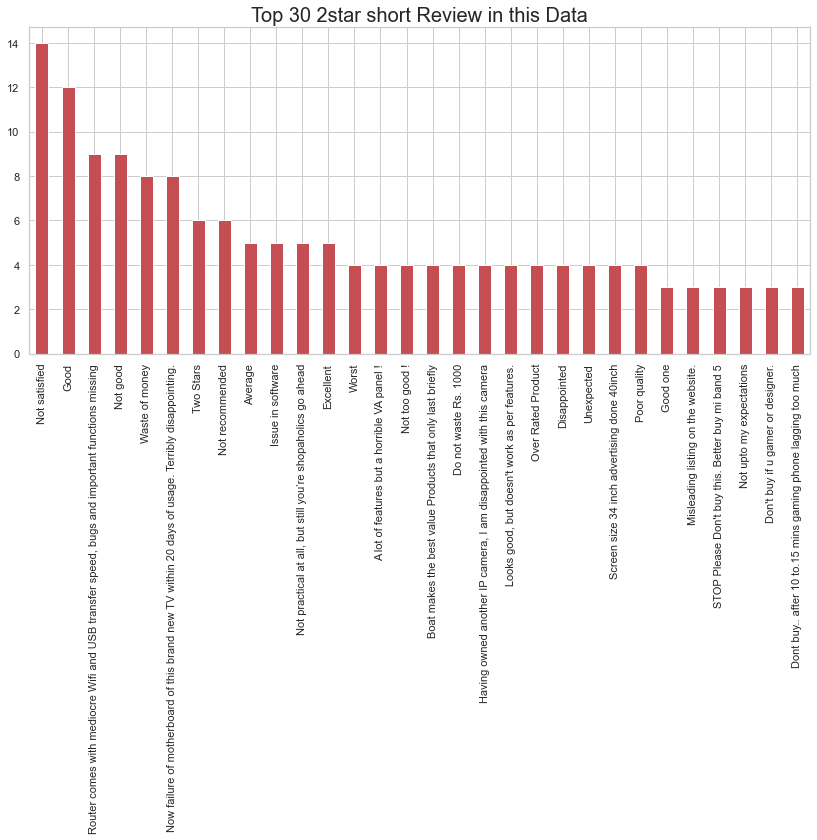

In [31]:
# top 30 2star short review in this data

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 2]
plt.figure(figsize=(14,6))
ratings['ShortReview'].value_counts()[:30].plot(kind='bar',color='r')
plt.xticks(rotation=90)
plt.title("Top 30 2star short Review in this Data",fontsize=20)
plt.show()

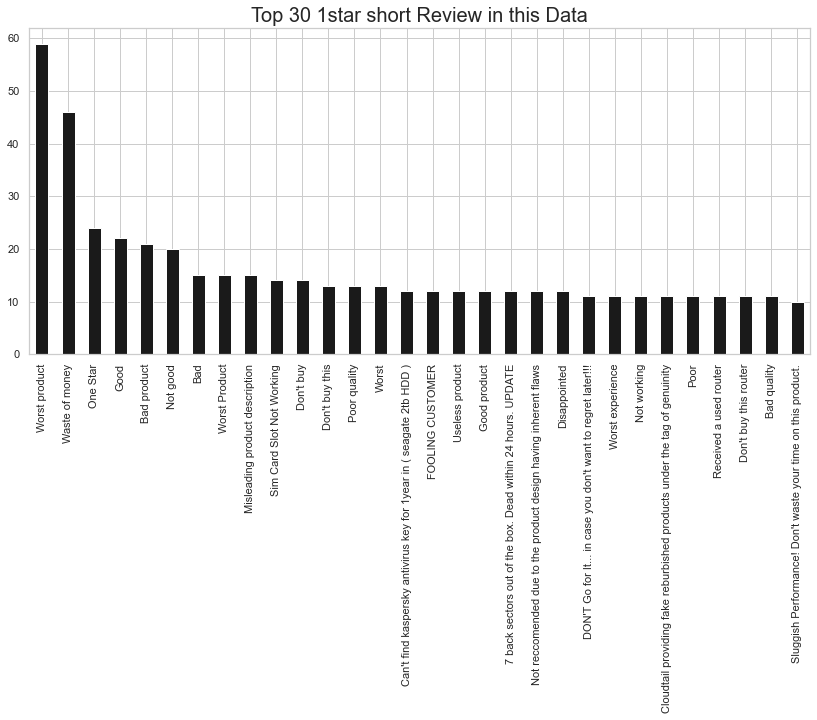

In [32]:
# top 30 1star short review in this data

sns.set(style=('whitegrid'))
ratings=df[df['Rating'] == 1]
plt.figure(figsize=(14,6))
ratings['ShortReview'].value_counts()[:30].plot(kind='bar',color='k')
plt.xticks(rotation=90)
plt.title("Top 30 1star short Review in this Data",fontsize=20)
plt.show()

In [39]:
# adding short review in review column

df["Review"]=df["Review"]+" "+df["ShortReview"]

# Model Training

In [40]:
# splitiing data into train and test

from sklearn.model_selection import train_test_split,cross_val_score

x_train,x_test,y_train,y_test=train_test_split(df['Review'],df['Rating'],test_size=0.23,random_state=42)

## Decision Tree

accuracy: 68.02%
              precision    recall  f1-score   support

           1       0.73      0.78      0.76      1364
           2       0.39      0.31      0.34       301
           3       0.47      0.42      0.44       440
           4       0.54      0.47      0.50       904
           5       0.75      0.80      0.77      2416

    accuracy                           0.68      5425
   macro avg       0.58      0.55      0.56      5425
weighted avg       0.67      0.68      0.67      5425



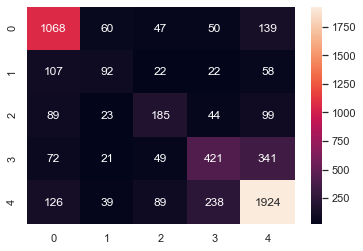

       y_test  Prediction
1826        5           5
1125        5           5
16152       4           4
4044        2           5
10057       2           4
20445       5           5
3016        1           1
11847       1           1
14617       1           1
6721        4           5
4863        1           4
425         3           4
5299        1           5
21422       4           1
18388       2           1
16827       4           5
8346        5           5
12373       2           1
3603        5           5
16112       1           1


In [41]:
# Vectorizing and applying TF-IDF

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Vectorizing and applying TF-IDF
pipe1 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier())])

# Fitting the model
model = pipe1.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

value1=pd.DataFrame()
value1['y_test']=y_test[0:20]
value1["Prediction"]=prediction[0:20]
print(value1)


## Random Forest

accuracy: 74.65%
              precision    recall  f1-score   support

           1       0.76      0.88      0.81      1364
           2       0.96      0.26      0.41       301
           3       0.96      0.33      0.49       440
           4       0.94      0.33      0.49       904
           5       0.71      0.97      0.82      2416

    accuracy                           0.75      5425
   macro avg       0.87      0.55      0.60      5425
weighted avg       0.79      0.75      0.71      5425



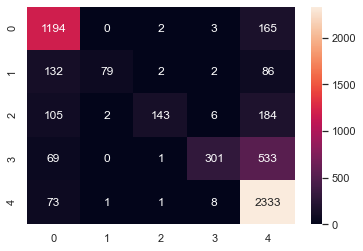

       y_test  Prediction
1826        5           5
1125        5           5
16152       4           4
4044        2           5
10057       2           1
20445       5           5
3016        1           1
11847       1           1
14617       1           1
6721        4           5
4863        1           1
425         3           1
5299        1           5
21422       4           1
18388       2           1
16827       4           5
8346        5           5
12373       2           1
3603        5           5
16112       1           1


In [42]:
# Vectorizing and applying TF-IDF

from sklearn.ensemble import RandomForestClassifier
pipe2 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

# Fitting the model
model = pipe2.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))

cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

value2=pd.DataFrame()
value2['y_test']=y_test[0:20]
value2["Prediction"]=prediction[0:20]
print(value2)


## AdaBoost Classifier

accuracy: 61.0%
              precision    recall  f1-score   support

           1       0.67      0.71      0.69      1364
           2       0.41      0.03      0.06       301
           3       0.28      0.13      0.18       440
           4       0.34      0.10      0.16       904
           5       0.63      0.90      0.74      2416

    accuracy                           0.61      5425
   macro avg       0.46      0.37      0.36      5425
weighted avg       0.55      0.61      0.55      5425



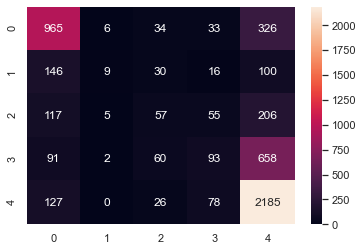

       y_test  Prediction
1826        5           5
1125        5           5
16152       4           5
4044        2           5
10057       2           5
20445       5           5
3016        1           5
11847       1           1
14617       1           1
6721        4           5
4863        1           5
425         3           1
5299        1           5
21422       4           1
18388       2           1
16827       4           5
8346        5           5
12373       2           1
3603        5           5
16112       1           4


In [43]:
# Vectorizing and applying TF-IDF

from sklearn.ensemble import AdaBoostClassifier
pipe3 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', AdaBoostClassifier())])

# Fitting the model
model = pipe3.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

value3=pd.DataFrame()
value3['y_test']=y_test[0:20]
value3["Prediction"]=prediction[0:20]
print(value3)


## Gradient Boosting Classifier

accuracy: 66.62%
              precision    recall  f1-score   support

           1       0.71      0.77      0.74      1364
           2       0.77      0.10      0.18       301
           3       0.58      0.17      0.27       440
           4       0.62      0.19      0.29       904
           5       0.65      0.94      0.77      2416

    accuracy                           0.67      5425
   macro avg       0.67      0.44      0.45      5425
weighted avg       0.66      0.67      0.61      5425



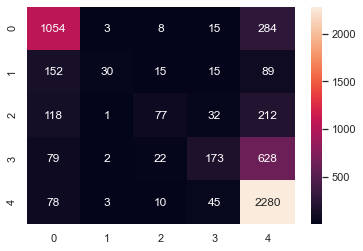

       y_test  Prediction
1826        5           5
1125        5           5
16152       4           5
4044        2           5
10057       2           5
20445       5           5
3016        1           5
11847       1           1
14617       1           1
6721        4           5
4863        1           5
425         3           1
5299        1           5
21422       4           1
18388       2           1
16827       4           5
8346        5           5
12373       2           2
3603        5           5
16112       1           1


In [44]:
# Vectorizing and applying TF-IDF

from sklearn.ensemble import GradientBoostingClassifier
pipe4 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier())])

# Fitting the model
model = pipe4.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

value4=pd.DataFrame()
value4['y_test']=y_test[0:20]
value4["Prediction"]=prediction[0:20]
print(value4)


## Bagging Classifier

accuracy: 71.85%
              precision    recall  f1-score   support

           1       0.70      0.86      0.77      1364
           2       0.58      0.27      0.36       301
           3       0.62      0.39      0.48       440
           4       0.64      0.42      0.51       904
           5       0.76      0.87      0.81      2416

    accuracy                           0.72      5425
   macro avg       0.66      0.56      0.59      5425
weighted avg       0.71      0.72      0.70      5425



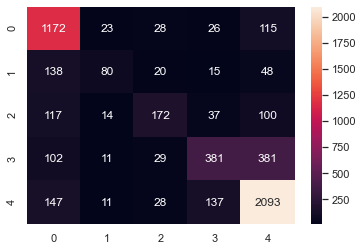

       y_test  Prediction
1826        5           5
1125        5           5
16152       4           4
4044        2           5
10057       2           1
20445       5           5
3016        1           1
11847       1           1
14617       1           1
6721        4           5
4863        1           5
425         3           1
5299        1           4
21422       4           1
18388       2           1
16827       4           5
8346        5           5
12373       2           1
3603        5           5
16112       1           1


In [45]:
# Vectorizing and applying TF-IDF

from sklearn.ensemble import BaggingClassifier
pipe5 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BaggingClassifier())])

# Fitting the model
model = pipe5.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(classification_report(y_test,prediction))
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='0')
plt.show()

value5=pd.DataFrame()
value5['y_test']=y_test[0:20]
value5["Prediction"]=prediction[0:20]
print(value5)


## cross validation score

In [47]:
models=[pipe1,pipe2,pipe3,pipe4,pipe5]
for i in models:
    cross=cross_val_score(i,df['Review'],df['Rating'],cv=5)
    print(">>>>>>>>>>>>>>>",i,"<<<<<<<<<<<<<<<")
    print(cross.mean())
    print(cross)
    print("\n")

>>>>>>>>>>>>>>> Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier())]) <<<<<<<<<<<<<<<
0.5688187547504262
[0.5495018  0.56540174 0.55798177 0.58087768 0.59033079]


>>>>>>>>>>>>>>> Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())]) <<<<<<<<<<<<<<<
0.6645618243650859
[0.66016536 0.66249735 0.64638541 0.66313335 0.69062765]


>>>>>>>>>>>>>>> Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', AdaBoostClassifier())]) <<<<<<<<<<<<<<<
0.6087609323862959
[0.5997456  0.60864957 0.60483358 0.60398558 0.62659033]


>>>>>>>>>>>>>>> Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', GradientBoostingClassifier())]) <<<<<<<<<<<<<<<
0.6319545296882426
[0.63239347 0.63408946 0.6243375  0.62136951 0.6475827 ]


>>>>>>>>>>>>>>> Pipeline(steps=[('vect',

In [48]:
# saving the best model

import joblib
joblib.dump(pipe2,"Rating_prediction.pkl")

['Rating_prediction.pkl']